In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
dataset = pd.read_csv('carEmissions.csv',encoding = "ISO-8859-1")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5118 entries, 0 to 5117
Data columns (total 34 columns):
Manufacturer                             5118 non-null object
Model                                    5118 non-null object
Description                              5118 non-null object
Transmission                             5086 non-null object
Engine Capacity                          5088 non-null float64
Fuel Type                                5118 non-null object
Electric energy consumption Miles/kWh    81 non-null float64
wh/km                                    81 non-null float64
Maximum range (Km)                       81 non-null float64
Maximum range (Miles)                    81 non-null float64
Metric Urban (Cold)                      5037 non-null float64
Metric Extra-Urban                       5037 non-null float64
Metric Combined                          5088 non-null float64
Imperial Urban (Cold)                    5037 non-null float64
Imperial Extra-Urban    

### Data Preprocessing

In [77]:
dataset.drop(dataset.columns[[20,27, 28, 29,30,31,32,33]], axis = 1 , inplace = True)
dataset["Total cost / 12000 miles"] = dataset["Total cost / 12000 miles"].apply(lambda x: int(x.replace(",","")[1:]))
dataset.corr()

,Engine Capacity,Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),Metric Urban (Cold),Metric Extra-Urban,Metric Combined,Imperial Urban (Cold),Imperial Extra-Urban,Imperial Combined,CO2 g/km,Total cost / 12000 miles,Noise Level dB(A),Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km]
Engine Capacity,1.000000,0.294557,-0.180521,-0.540751,-0.536650,0.730103,0.739264,0.734707,-0.521969,-0.611703,-0.437390,0.781482,0.754090,0.219768,0.002617,0.086846,0.043877,0.076002,0.143144
Electric energy consumption Miles/kWh,0.294557,1.000000,-0.740918,-0.271348,-0.270158,NaN,NaN,0.384032,NaN,NaN,-0.229779,0.376989,0.030757,-0.016551,0.287247,0.060573,0.055502,0.865136,-0.992863
wh/km,-0.180521,-0.740918,1.000000,0.533743,0.533267,NaN,NaN,-0.301123,NaN,NaN,0.089863,-0.476550,0.037897,0.078019,-0.384549,-0.162420,0.012397,-0.861293,0.988452
Maximum range (Km),-0.540751,-0.271348,0.533743,1.000000,0.999996,NaN,NaN,-0.521211,NaN,NaN,0.929407,-0.824271,-0.563584,0.129971,-0.333570,-0.245041,-0.268642,-0.841158,0.965345
Maximum range (Miles),-0.536650,-0.270158,0.533267,0.999996,1.000000,NaN,NaN,-0.521826,NaN,NaN,0.929559,-0.824120,-0.563861,0.130266,-0.335266,-0.246620,-0.266473,-0.853067,0.979012
Metric Urban (Cold),0.730103,NaN,NaN,NaN,NaN,1.000000,0.931228,0.984590,-0.869986,-0.829435,-0.886069,0.957868,0.981652,0.285150,0.333229,0.079992,-0.257749,0.189012,0.089903
Metric Extra-Urban,0.739264,NaN,NaN,NaN,NaN,0.931228,1.000000,0.976556,-0.843996,-0.920025,-0.922884,0.972624,0.978588,0.272991,0.270229,0.058810,-0.202733,0.158286,0.097970
Metric Combined,0.734707,0.384032,-0.301123,-0.521211,-0.521826,0.984590,0.976556,1.000000,-0.877804,-0.889933,-0.770158,0.980892,0.995023,0.280587,0.325101,0.132465,-0.208128,0.190518,0.099031
Imperial Urban (Cold),-0.521969,NaN,NaN,NaN,NaN,-0.869986,-0.843996,-0.877804,1.000000,0.914440,0.963720,-0.836398,-0.872144,-0.280405,-0.362184,-0.061930,0.303997,-0.160601,-0.087981
Imperial Extra-Urban,-0.611703,NaN,NaN,NaN,NaN,-0.829435,-0.920025,-0.889933,0.914440,1.000000,0.957122,-0.878671,-0.890255,-0.260478,-0.271653,-0.015279,0.235406,-0.147477,-0.093015


- we can see that the Metric Urban , Metric extra urban , metric combined and co2 have very high correlation with the total cost , so we will choose these features to predict the cost

In [78]:
goal_set = dataset["Total cost / 12000 miles"]
feature_set = dataset[{"Metric Urban (Cold)","Metric Extra-Urban","Metric Combined","CO2 g/km"}]

In [79]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer()

feature_set = mean_imputer.fit_transform(feature_set)


In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_set, goal_set, test_size = 0.2, random_state = 0)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
goal_predict = model.predict(x_test)

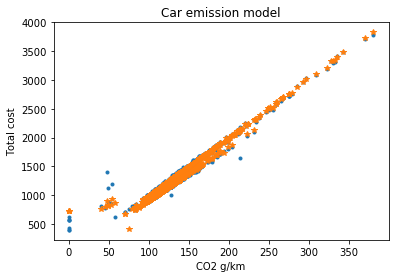

In [94]:
plt.plot(x_test[0:,3], y_test,'.', x_test[0:,3], goal_predict, '*')
plt.title('Car emission model')
plt.xlabel('CO2 g/km')
plt.ylabel('Total cost')
plt.show()